In [1]:
from IPython.display import HTML, Javascript, display
import ipywidgets as wi
from PIL import Image
from io import BytesIO
from base64 import b64encode, b64decode
from pathlib import Path
from ipyfilechooser import FileChooser
from utils import *

In [2]:
ID, canvas = ID_canvas()
save_input = wi.Text(layout=wi.Layout(width="90%"))
app =  wi.VBox((
    save_input,
    canvas,
))
display(app,
Javascript(f"""
{Path('spylus.js').read_text()}
new (mix(Save))({{
    canvas: document.getElementById("{ID}"),
    save_input: elem('{ID}', 'input', 0),
}});
"""))

#decode(save_input.value)

<IPython.core.display.Javascript object>

In [3]:
ID, canvas = ID_canvas()
fc = FileChooser(use_dir_icons=True)
output = wi.Output()

@output.capture(clear_output=True)
def load(chooser):
    image = Image.open(fc.selected)
    text = encode(image)
    display(Javascript(f'window.app{ID}.load("{text}")'))

fc.register_callback(load)

app =  wi.VBox((
    fc,
    canvas,
    output,
))
display(app,
Javascript(f"""
{Path('spylus.js').read_text()}
window.app{ID} = new (mix(Load))({{
    canvas: document.getElementById("{ID}"),
}});
"""))

<IPython.core.display.Javascript object>

In [6]:
ID, canvas = ID_canvas()
copy_button = wi.Button(description="copy")
app =  wi.VBox((
    copy_button,
    canvas,
))
display(app,
Javascript(f"""
{Path('spylus.js').read_text()}
let app = new (Copy(Canvas))({{
    canvas: document.getElementById("{ID}"),
    copy_button: elem('{ID}', 'button', 0),
}});
//app.strokeStyle = (e)=>'red';
"""))

<IPython.core.display.Javascript object>

In [7]:
ID, canvas = ID_canvas()
paste_button = wi.Button(description="paste")
app =  wi.VBox((
    paste_button,
    canvas,
))
display(app,
Javascript(f"""
{Path('spylus.js').read_text()}
new (Paste(Canvas))({{
    canvas: document.getElementById("{ID}"),
    paste_button: elem('{ID}', 'button', 0),
}});
"""))

<IPython.core.display.Javascript object>

In [8]:
ID, canvas = ID_canvas()
color_input = wi.ColorPicker()
app = wi.AppLayout(
    center=wi.VBox((
        color_input,
        canvas,
    )),
)
display(app,
Javascript(f"""
{Path('spylus.js').read_text()}
new (Color(Canvas))({{
    canvas: document.getElementById("{ID}"),
    color_input: elem('{ID}', 'input', 0),
}});
"""))

AppLayout(children=(VBox(children=(ColorPicker(value='black'), HTML(value='\n    <canvas\n        id=d017bc42\…

<IPython.core.display.Javascript object>

In [9]:
ID, canvas = ID_canvas()
width_select = wi.Dropdown(options=range(1,10), value=5)
ID, canvas = ID_canvas()
app = wi.VBox((
    width_select,
    canvas,
))
display(app,
Javascript(f"""
{Path('spylus.js').read_text()}
new (Width(Canvas))({{
    canvas: document.getElementById("{ID}"),
    width_select: elem('{ID}', 'select', 0),
}});
"""))

<IPython.core.display.Javascript object>

In [34]:
import ipycanvas as ca
ID, canvas = ID_multicanvas()
marker = HTML(f'<div id="{ID}"></div>')
selector = wi.Dropdown(options=range(2), value=0)

save_input0 = wi.Text(layout=wi.Layout(width="10%"))
save_input1 = wi.Text(layout=wi.Layout(width="10%"))
copy_button0 = wi.Button(description="copy", layout=wi.Layout(width="10%"))
copy_button1 = wi.Button(description="copy", layout=wi.Layout(width="10%"))
paste_button0 = wi.Button(description="paste", layout=wi.Layout(width="10%"))
paste_button1 = wi.Button(description="paste", layout=wi.Layout(width="10%"))
color_input0 = wi.ColorPicker()
color_input1 = wi.ColorPicker()
width_select0 = wi.Dropdown(options=range(1,20), value=3)
width_select1 = wi.Dropdown(options=range(1,20), value=3)

fc0 = FileChooser(use_dir_icons=True)
out = wi.Output()
out_ca = ca.Canvas(width=512, height=512, sync_image_data=True)
out_ca.fill_style = '#a9cafc'
out_ca.fill_rect(0, 0, 512, 512)
out_ca.fill_style = 'black'
out_ca.font = '32px serif'
out_ca.fill_text('Output initialized', 0, 512)

@out.capture(clear_output=True)
def load0(chooser):
    image = Image.open(fc0.selected)
    text = encode(image)
    display(Javascript(f'window.app0.load("{text}")'))

fc0.register_callback(load0)

app =  wi.VBox((
    wi.HBox((out_ca, canvas,)),
    wi.HBox((save_input0, copy_button0, paste_button0, color_input0, width_select0,)),
    wi.HBox((save_input1, copy_button1, paste_button1, color_input1, width_select1,)),
    selector,
    fc0,
    out,
))
display(marker, app,
Javascript(f"""
{Path('spylus.js').read_text()}
window.app0 = new (mix(
    Save, Load, Copy, Paste, Color, Width
))({{
    canvas: document.getElementById("{ID}0"),
    save_input: elem('{ID}', 'input', 0),
    copy_button: elem('{ID}', 'button', 0),
    paste_button: elem('{ID}', 'button', 1),
    color_input: elem('{ID}', 'input', 1),
    width_select: elem('{ID}', 'select', 0),
}});

window.app1 = new (mix(
    Save, Copy, Paste, Color, Width
))({{
    canvas: document.getElementById("{ID}1"),
    save_input: elem('{ID}', 'input', 3),
    copy_button: elem('{ID}', 'button', 2),
    paste_button: elem('{ID}', 'button', 2),
    color_input: elem('{ID}', 'input', 4),
    width_select: elem('{ID}', 'select', 1),
}});

new Selector({{
    apps: [app0, app1],
    selector_select: elem('{ID}', 'select', 2),
}});
"""))

<IPython.core.display.Javascript object>

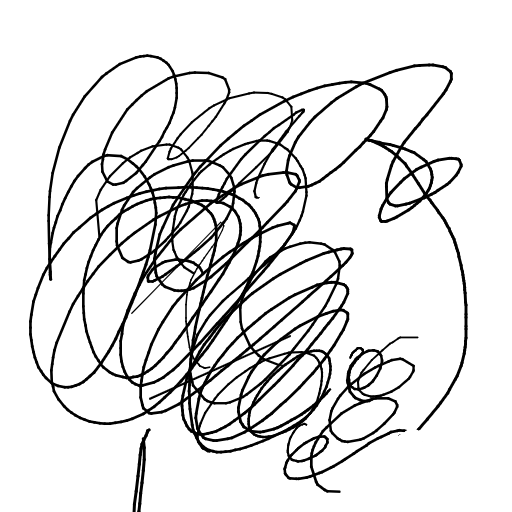

In [39]:
decode(save_input0.value)